<a href="https://colab.research.google.com/github/Abhishek1236/tensorflow-models/blob/master/basics_of_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
a = tf.constant(6, name = 'constant_a')
b = tf.constant(8,name = 'constant_b')
c = tf.constant(40, name = 'constant_c')
d = tf.constant(8,name = 'constant_d')

In [0]:
mul = tf.multiply(a,b, name = 'mul')
div = tf.div(c,d,name = 'div')
addn = tf.add_n([mul,div],name = "addn")

In [0]:
print(addn)

Tensor("addn_2:0", shape=(), dtype=int32)


In [0]:
sess = tf.Session()

In [0]:
sess.run(addn)

53

In [0]:
sess.run(div)

5

In [0]:
#visualize a graph 
writer = tf.summary.FileWriter('/content/sample_data',sess.graph)
writer.close()
sess.close()

In [0]:
pip install tensorboardcolab

In [0]:
import tensorboardcolab

Using TensorFlow backend.


In [0]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [0]:
#%tensorboard --logdir ="/content/sample_data"

In [0]:
#%tensorboard --logdir logs

In [0]:
#simple math comand in tensorflow 
a = tf.constant(6.0, name = 'constant_a')
b = tf.constant(8.,name = 'constant_b')
c = tf.constant(40., name = 'constant_c')
d = tf.constant(8.,name = 'constant_d')

In [0]:
square = tf.square(a,name = 'square_a')
power = tf.pow(b,c,name = "pow_b_c")
sqrt = tf.sqrt(d,name = "sqrt_d")

final_Sum = tf.add_n([square,power,sqrt],name = "final_sum")
sess = tf.Session()
sess.run(square)
sess.run(power)
sess.run(sqrt)
sess.run(final_Sum)
sess.close()

In [0]:
#numpy arrays in tensorflow 
import numpy as np

sess = tf.Session()

In [0]:
zero = np.array(30,dtype = np.int32)

In [4]:
sess.run(tf.rank(zero))

0

In [5]:
sess.run(tf.shape(zero))

array([], dtype=int32)

In [0]:
sess.close() 

In [17]:
#tutorial about place holder and feed dict

import tensorflow as tf
x = tf.placeholder(tf.int32,shape= [3],name = 'x')
y = tf.placeholder(tf.int32,shape = [3],name = 'y')

sum_x = tf.reduce_sum(x,name = 'sum_x')
prod_y = tf.reduce_prod(y,name = 'prod_y')

final_div = tf.div(sum_x,prod_y,name = "final_div")
final_mean = tf.reduce_mean([sum_x,prod_y],name = 'final_mean')

with tf.Session() as sess:
  print("sum x:",sess.run(sum_x,feed_dict= {x:[100,200,300]}))
  print("prod y: ", sess.run(prod_y,feed_dict={y:[1,2,3]}))
  #print(" final_div  and final_mean is ",sess.run(fetches=[final_div,final_mean],feed_dict= {sum_x:[100,200,300],prod_y:[1,2,3]}))


sum x: 600
prod y:  6


In [0]:
sess.close()

In [25]:
#variables 
import tensorflow as tf

#y = wx+b

w = tf.Variable([2.5,4.0],tf.float32,name = 'var_w')
x = tf.placeholder(tf.float32,name = 'x')
b = tf.Variable([5.0,10.0],tf.float32,name = 'var_b')

y = w*x +b 
# initialize all variables declared 
init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)
  print("final result : Wx+b ",sess.run(y,feed_dict={x:[10,100]}))

number = tf.Variable(2)
multiplier = tf.Variable(1)

init = tf.global_variables_initializer()

result = number.assign(tf.multiply(number,multiplier))

with tf.Session() as sess:
  sess.run(init)
  for i in range(5):
    print("result number * multiplier =",sess.run(result))
    print("increment multiplier,new value = ",sess.run(multiplier.assign_add(1)))


final result : Wx+b  [ 30. 410.]
result number * multiplier = 2
increment multiplier,new value =  2
result number * multiplier = 4
increment multiplier,new value =  3
result number * multiplier = 12
increment multiplier,new value =  4
result number * multiplier = 48
increment multiplier,new value =  5
result number * multiplier = 240
increment multiplier,new value =  6


In [28]:
#graph
import tensorflow as tf

g1 = tf.Graph()
with g1.as_default():
  with tf.Session() as sess:
    # Y = AX +B
    a = tf.constant([5,7],tf.int32,name = 'a')
    x = tf.placeholder(tf.int32,name = 'x')
    b = tf.constant([3,4],tf.int32,name = 'b')
    y = a*x + b
    print(sess.run(y,feed_dict={x:[10,100]}))
    assert y.graph is g1

default_graph = tf.get_default_graph()
#with tf.Session() as sess:
  #a = tf.constant......
sess.close()

[ 53 704]


In [32]:
#NAMED scopes 
import tensorflow as tf

a = tf.constant([4],tf.int32,name = 'a')
b = tf.constant([5],tf.int32,name = 'b')
c = tf.constant([6],tf.int32,name = 'c')

x = tf.placeholder(tf.int32,name = 'x')

# y1 = ax^2 + bx+ c
with tf.name_scope('equation_1'):
  ax2_1 = tf.multiply(a,tf.pow(x,2),name = 'ax2_1')
  bx = tf.multiply(b,x,name = 'bx')
  y1 = tf.add_n([ax2_1,bx,c],name='y1')

# y2 = ax^2 +bx^2
with tf.name_scope('equation_2'):
  ax2_2 = tf.multiply(a,tf.pow(x,2),name = 'ax2_2')
  bx2 = tf.multiply(b,tf.pow(x,2),name = 'bx2')
  y2 = tf.add_n([ax2_2,bx2],name='y2')

with tf.name_scope('final_Sum'):
  y = y1+ y2

with tf.Session() as sess:
  print(sess.run(y,feed_dict={x:[10]}))
  writer = tf.summary.FileWriter('/content/sample_data',sess.graph)
  writer.close()


[1356]


In [35]:
#interactive session 
import tensorflow as tf 

sess = tf.InteractiveSession()

a = tf.constant([4],tf.int32,name = 'a')
x = tf.placeholder(tf.int32,name = 'x')

y = a*x

y.eval(feed_dict={x:[5]})

#sess.close()

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


array([20], dtype=int32)

In [0]:
sess.close()

In [42]:
#understanding linear regression
import tensorflow as tf

#model parameters 
w = tf.Variable([.3],dtype = tf.float32)
b = tf.Variable([-.3],dtype= tf.float32)

x= tf.placeholder(tf.float32)
linear_model = w*x+b

y = tf.placeholder(tf.float32)

#loss 
loss = tf.reduce_sum(tf.square(linear_model - y))

#optimizer 
optimizer = tf.train.GradientDescentOptimizer(0.01)

train = optimizer.minimize(loss)

# training_data 

x_train = [1,2,3,4]
y_train = [0,-1,-2,-3]

init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  for i in range(1000):
    sess.run(train,{x:x_train,y:y_train})
  #evaluate training accuracy 
  curr_w, curr_b,curr_loss = sess.run([w,b,loss],{x:x_train,y:y_train})
  print("w: %s b :%s loss: %s"%(curr_w,curr_b,curr_loss))

w: [-0.9999969] b :[0.9999908] loss: 5.6999738e-11


In [41]:
pip install Pillow

image shape (368, 380, 3)


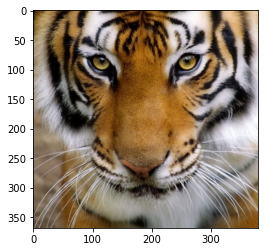

(380, 368, 3)


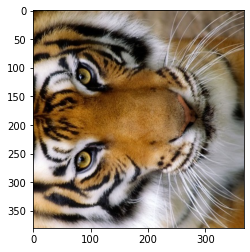

In [49]:
#WORKING WITH IMAGES
#representing images as 3d tensors
# read in an image using matplotlib library and then transpose it using tensorflow 
import tensorflow as tf
import matplotlib.image as mp_img
import matplotlib.pyplot as plt
import os 

filename = "/content/tiger_avatar_03_hd_pictures_169017.jpg"
image = mp_img.imread(filename)

print('image shape',image.shape)
#print('image array',image)
plt.imshow(image)
plt.show()
x = tf.Variable(image,name = 'x')

init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)
  #transpose = tf.transpose(x,perm=[1,0,2])
  transpose = tf.image.transpose_image(image)
  result = sess.run(transpose)
  print(result.shape)
  plt.imshow(result)
  plt.show()

In [67]:
#read a list of images in tensorflow using a queue and coordinators 
import tensorflow as tf 
from PIL import Image

original_image_list = ['/content/tiger_avatar_03_hd_pictures_169017.jpg',
                       '/content/index.jpg']
# make a queue of files including all the image specified 

filename_queue = tf.train.string_input_producer(original_image_list)

# read an entire image file 

image_reader = tf.WholeFileReader()

with tf.Session() as sess:
  #coordinate the loading of image files
  coord = tf.train.Coordinator()
  threads = tf.train.start_queue_runners(sess = sess,coord = coord)
  image_list = []
  for i in range(len(original_image_list)):
    # read whole file from the queue , the first returned value in the tuple
    # is the file name which we are ignoring 
    _,image_file = image_reader.read(filename_queue)
    # decode the image as a jpeg file , this will turn it into tensor which
    # we can use in training
    image = tf.image.decode_jpeg(image_file)
    # get a tensor of resized images
    image = tf.image.resize(image,[224,224])

    image.set_shape((224,224,3))
    #fliping the image 
    image = tf.image.flip_up_down(image)
    #cropping an image 
    image = tf.image.central_crop(image,central_fraction = 0.5)

    
    # get an image tensor and print its value 
    image_array = sess.run(image)
    print(image_array.shape)
    Image.fromarray(image_array.astype('uint8'),'RGB').show()
    # the expand dims add a new dimension 
    image_list.append(tf.expand_dims(image_array,0))

  #finish off the filename queue cordinator 
  coord.request_stop()
  coord.join(threads)
  index = 0
  summary_writer = tf.summary.FileWriter('/content/sample_data',graph=sess.graph)
  for image_tensor in image_list:
    summary_str = sess.run(tf.summary.image("image"+ str(index),image_tensor))
    summary_writer.add_summary(summary_str)
    index += 1
  summary_writer.close()

(112, 112, 3)
(112, 112, 3)
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
tf.float32 has type DType, but expected one of: int, long, bool
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
tf.float32 has type DType, but expected one of: int, long, bool


In [60]:
#list of images 
#read a list of images in tensorflow using a queue and coordinators 
import tensorflow as tf 
from PIL import Image

original_image_list = ['/content/tiger_avatar_03_hd_pictures_169017.jpg',
                       '/content/index.jpg']
# make a queue of files including all the image specified 

filename_queue = tf.train.string_input_producer(original_image_list)

# read an entire image file 

image_reader = tf.WholeFileReader()

with tf.Session() as sess:
  #coordinate the loading of image files
  coord = tf.train.Coordinator()
  threads = tf.train.start_queue_runners(sess = sess,coord = coord)
  image_list = []
  for i in range(len(original_image_list)):
    # read whole file from the queue , the first returned value in the tuple
    # is the file name which we are ignoring 
    _,image_file = image_reader.read(filename_queue)
    # decode the image as a jpeg file , this will turn it into tensor which
    # we can use in training
    image = tf.image.decode_jpeg(image_file)
    # get a tensor of resized images
    image = tf.image.resize(image,[224,224])

    image.set_shape((224,224,3))
    # get an image tensor and print its value 
    image_array = sess.run(image)
    print(image_array.shape)
   # Image.fromarray(image_array.astype('uint8'),'RGB').show()
    # the expand dims add a new dimension 
    #image_list.append(tf.expand_dims(image_array,0))
    image_tensor = tf.stack(image_array)
    print(image_tensor)
    image_list.append(image_tensor)

  #finish off the filename queue cordinator 
  coord.request_stop()
  coord.join(threads)

  image_tensor = tf.stack(image_list)
  print(image_tensor)

(224, 224, 3)
Tensor("stack_4:0", shape=(224, 224, 3), dtype=float32)
(224, 224, 3)
Tensor("stack_5:0", shape=(224, 224, 3), dtype=float32)
Tensor("stack_6:0", shape=(2, 224, 224, 3), dtype=float32)


In [68]:
#using the k- nearest neighbors for digit recognition 
#getting the mnist data 
import numpy as np
import tensorflow as tf

# import mnist data 
from tensorflow.examples.tutorials.mnist import input_data

# store data in /tmp/data 
mnist = input_data.read_data_sets('/content/sample_data',one_hot = True)

training_digits,training_labels = mnist.train.next_batch(5000)
test_digits, test_labels = mnist.test.next_batch(200)

training_digits_pl = tf.placeholder("float",[None,784])

test_digit_pl = tf.placeholder("float",[784])

#nearest neighbour calculation using l1 distance
l1_distance = tf.abs(tf.add(training_digits_pl,tf.negative(test_digit_pl)))

distance = tf.reduce_sum(l1_distance,axis = 1)

#prediction : get min distance index(nearest neighbour)
pred = tf.arg_min(distance,0)

accuracy = 0.
# initializing the variables
init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  #loop over test data 
  for i in range(len(test_digits)):
    #getting nearest neighbor 
    nn_index = sess.run(pred,feed_dict={training_digits_pl:training_digits,\
                                        test_digit_pl:test_digits[i,:]})
    #get the nearest neighbor class label and compare it to true label 
    print("test",i,"prediction",np.argmax(training_labels[nn_index]), \
          "true label:",np.argmax(test_labels[i]))
    
    # calculate accuracy 
    if np.argmax(training_labels[nn_index]) == np.argmax(test_labels[i]):
      accuracy += 1./len(test_digits)

  print("Done!")
  print("Accuracy:",accuracy)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /content/sample_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /content/sample_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /content/sample_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /content/sample_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternati